In [4]:
%reload_ext autoreload
%autoreload 2
# %pdb off

import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import time
from copy import copy
import random
import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from dominoes import leagueManager as lm
from dominoes import gameplay as dg
from dominoes import agents as da
from dominoes import functions as df
from dominoes import fileManagement as fm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [6]:
import valueAgentELOs

In [81]:
results = np.load(valueAgentELOs.resPath / (valueAgentELOs.getFileName()+'.npy'), allow_pickle=True).item()
print("results keys: ", [k for k in results.keys()])

# get sorted unique representation of agent types (without training details)
agentTypes = [name[:name.find(' ') if name.find(' ')>0 else len(name)] for name in results['names']]
uniqueTypes, typeIdx, idxType = np.unique(np.array(agentTypes), return_index=True, return_inverse=True)
idxSort = sorted(range(len(typeIdx)), key=typeIdx.__getitem__)
uniqueTypes = [uniqueTypes[index] for index in idxSort]
sortKey = dict(zip(idxSort, range(len(idxSort))))
idxType = [sortKey[it] for it in idxType]
print("agent types: ", uniqueTypes)
print("idx each type: ", idxType)
typeForAvg = agentTypes[::2]
idxTypeForAvg = idxType[::2]
print("names each average: ", typeForAvg)

results keys:  ['elo', 'averageScore', 'averageHandWins', 'trackedElo', 'names']
agent types:  ['basicValueAgent', 'lineValueAgent', 'persistentLineAgent', 'doubleAgent', 'greedyAgent', 'dominoeAgent', 'stupidAgent']
idx each type:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
names each average:  ['basicValueAgent', 'basicValueAgent', 'basicValueAgent', 'lineValueAgent', 'lineValueAgent', 'lineValueAgent', 'persistentLineAgent', 'doubleAgent', 'greedyAgent', 'dominoeAgent', 'stupidAgent']


In [77]:
cmap = df.ncmap('Dark2', vmin=0, vmax=len(uniqueTypes)-1)
lstyleWithin = ['-','--',':']
lstyleOther = ['-']
lstyle = [*lstyleWithin, *lstyleWithin, *lstyleOther*5]

In [64]:
df.averageGroups(results['elo'], 2, axis=0)

array([1525.54657, 1520.12036, 1497.90387, 1887.89757, 1886.48545,
       1918.79855, 1650.94049, 1573.26147, 1424.37454,  909.55248,
        705.11865])

In [71]:
results['trackedElo'].shape

(5000, 22)

In [80]:
cmap(1)

(0.8509803921568627, 0.37254901960784315, 0.00784313725490196, 1.0)

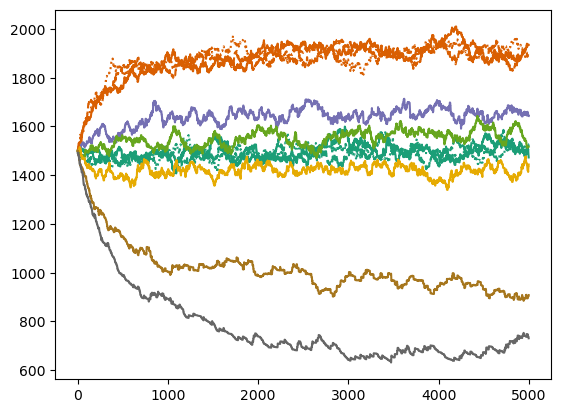

In [82]:
plt.close('all')
fig = plt.figure()
for idx, telo in enumerate(df.averageGroups(results['trackedElo'], 2, axis=1).T):
    plt.plot(range(5000), telo, c=cmap(idxTypeForAvg[idx]), linestyle=lstyle[idx])
plt.show()

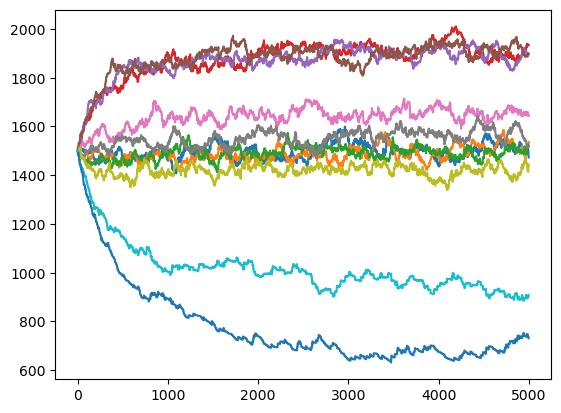

In [73]:
plt.plot(range(5000), df.averageGroups(results['trackedElo'], 2, axis=1))